# 1. Popularity Based Recommendation System

In [2]:
# All Libraries to Import
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## About the Dataset (jokes.csv)



 
1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").
  
2. One row per user
3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.



### Q1. Read the data (jokes.csv)

In [4]:
jokes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GL-Recommendation_Systems_LAB/jokes.csv')

### Q2. Create new Dataframe `ratings` starting from column `joke1` and consider first 200 rows only



In [5]:
jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [6]:
jokes.shape

(24983, 101)

In [8]:
ratings = jokes.iloc[:200,1:]

In [9]:
ratings.shape

(200, 100)

### Q3. Preprocess `ratings`


*   Verify presence of null values
*   Replace null with 0



In [10]:
ratings.isnull().any().sum()

0

In [11]:
ratings.replace(to_replace=99,value=0,inplace=True) # we have replaced 0; 0 is the median

In [12]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,Joke40,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,0.0,0.00,0.0,0.00,0.00,0.00,0.00,-9.42,0.00,0.00,0.00,-7.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,0.00,8.25,0.00,0.00,7.48,7.28,7.28,8.93,0.00,6.17,7.28,0.00,0.00,8.98,7.33,0.00,6.17,9.08,7.33,...,6.46,7.28,0.00,0.00,7.04,7.28,0.00,7.28,8.25,0.00,0.0,0.00,0.0,0.00,0.00,8.93,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.03,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,0.00,0.00,0.00,0.00,2.91,3.93,6.75,6.60,0.00,6.65,-6.12,0.00,7.57,6.21,6.65,0.00,-8.30,7.18,2.82,...,0.00,-3.69,0.00,0.00,7.82,0.24,0.00,7.28,-2.33,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.00,0.00,-2.33,0.00,0.00,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,0.0,0.00,0.0,0.00,0.00,0.00,4.13,0.00,0.00,0.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Q4. Find mean for each joke


*   Find mean of 100 jokes



In [20]:
means_rating = ratings.mean(axis=0)

In [22]:
means_rating

Joke1      0.53005
Joke2      0.59390
Joke3      0.23765
Joke4     -0.70100
Joke5     -0.03790
            ...   
Joke96     0.41755
Joke97     0.75500
Joke98     0.09370
Joke99     0.13500
Joke100    0.52440
Length: 100, dtype: float64

### Q5. List most popular 10 jokes

In [27]:
means_rating.sort_values(ascending=False)[:10] # Top 10 jokes

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64

#2. Collaborative Filtering based Recommendation System

## About the Dataset

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

#### Execute below cells to read the datasets

In [94]:
bookPath = '/content/drive/MyDrive/Colab Notebooks/GL-Recommendation_Systems_LAB/BX-Books.csv'
userPath = '/content/drive/MyDrive/Colab Notebooks/GL-Recommendation_Systems_LAB/BX-Users.csv'
ratingPath = '/content/drive/MyDrive/Colab Notebooks/GL-Recommendation_Systems_LAB/BX-Book-Ratings.csv'

books = pd.read_csv(bookPath, sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv(userPath, sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv(ratingPath, sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

# Q1. Explore the Dataset

1.   Check shape of all the datasets
2.   Print Columns in all the datasets
3.   Remove last 3 columns of `books` ('imageUrlS', 'imageUrlM', 'imageUrlL')and verify



In [95]:
print(f'Shape of Books DF {books.shape}')
print(f'Shape of Users DF {users.shape}')
print(f'Shape of Rating DF {ratings.shape}')

Shape of Books DF (271360, 8)
Shape of Users DF (278858, 3)
Shape of Rating DF (1149780, 3)


In [96]:
print(f'Books Columns ----- {books.columns}')
print(f'Users Columns ----- {users.columns}')
print(f'Ratings Columns ----- {ratings.columns}')

Books Columns ----- Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')
Users Columns ----- Index(['userID', 'Location', 'Age'], dtype='object')
Ratings Columns ----- Index(['userID', 'ISBN', 'bookRating'], dtype='object')


In [97]:
books = books.iloc[:,:-3] #Replacing the Original DF; dropping the last 3 columns

In [98]:
books.columns #Reconfirming if the last 3 columns were dropped

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher'], dtype='object')

# Q2. Data Preprocessing

### Create new DataFrame `ratings_new` with:
1.   Books from `ratings` Dataset, which exists in `books` Dataset (Intersect on ISBN)
2.   Users from `ratings` Dataset, which exists in `users` Dataset (Intersect on userID)


In [99]:
ratings_new=ratings[ratings.ISBN.isin(books.ISBN)]
ratings_new=ratings_new[ratings_new.userID.isin(users.userID)]
ratings_new.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [100]:
ratings_new.shape

(1031136, 3)

# Q3. Data Preprocessing

### In new Dataframe, drop rows with 0 `bookRating`, since 0 is mentioned as 'Implicit Rating'.
#### (Check shape of new Dataframe before and after dropping 0s)


In [101]:
ratings_new.shape

(1031136, 3)

In [102]:
ratings_new['bookRating'].value_counts()

0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: bookRating, dtype: int64

In [103]:
ratings_new = ratings_new[ratings_new['bookRating'] != 0]

In [104]:
ratings_new.shape

(383842, 3)

# Q4. Check rating's distribution
### Plot a visual to identify highest occuring rating 

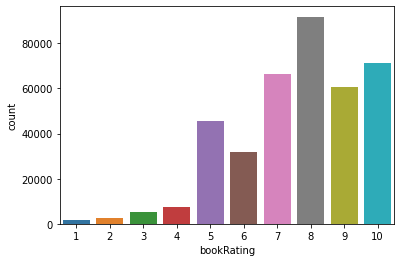

In [105]:
import seaborn as sns
sns.countplot(data=ratings_new, x='bookRating')

# Majority of the time 8 occurs

# Q5. Build a User-Based Collaborative Filtering model



1.   Consider users who have rated atleast 100 books
2.   Transform data to surprise format
3.   Assure that only user, book and rating columns are present in the new dataset in surprise format



In [ ]:
!pip install scikit-surprise

In [108]:
ratings_new=ratings_new.groupby('userID').filter(lambda x: len(x) >= 100)
ratings_new.reset_index()
ratings_new.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


In [113]:
ratings_new.shape

(103271, 3)

In [109]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

reader = Reader(rating_scale=(1, 10))

In [110]:
data = Dataset.load_from_df(ratings_new[['userID', 'ISBN', 'bookRating']],reader)

# Q6. Apply SVD for user based filtering


1.   Split the data into train and test
2.   Train model on SVD
3.   Test Accuracy of the model




In [117]:
from surprise.model_selection import train_test_split
trainset, testset=train_test_split(data,test_size=0.25,random_state=11)

In [118]:
from surprise import SVD
from surprise import accuracy

In [125]:
svd_model = SVD(n_factors=50, biased=False)
svd_model.fit(trainset)

In [126]:
test_pred=svd_model.test(testset)

In [132]:
accuracy.rmse(test_pred)

RMSE: 3.1586


3.1586050432842283

# Q7. Create a function to generate `n` recommendations for user `x`. (n, x should be parameterized)

In [137]:
test_pred=pd.DataFrame(test_pred)

def get_recommendations(userId,num):
  user_rec = test_pred[test_pred['uid'] == userId][['uid','iid','r_ui','est']].sort_values(by = 'est',ascending = False).head(num)
  return user_rec

In [138]:
get_recommendations(143253,5)  

,uid,iid,r_ui,est
6254,143253,014028009X,10.0,8.553564
989,143253,0060235322,10.0,7.821698
18599,143253,0679888101,6.0,7.821698
18012,143253,0399224459,10.0,7.821698
21503,143253,0394837886,6.0,7.821698
